In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("loan_prediction (1).csv")

In [9]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
obj=(df.dtypes=='object')
print("Categorical variables :",len(list(obj[obj].index)))

Categorical variables : 8


In [31]:
df.drop(['Loan_ID'],axis=1,inplace=True)

KeyError: "['Loan_ID'] not found in axis"

In [33]:
obj=(df.dtypes=='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1



<Figure size 1296x2592 with 0 Axes>

In [34]:
for col in object_cols:
    y=df[col].value_counts()
    plt.subplot(11,8,index)
    plt.xticks(rotation=0)
    sns.barplot(x=list(y.index), y=y)
    index+=1

In [35]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
obj=(df.dtypes=='object')
for col in list(obj[obj].index):
  df[col]=label_encoder.fit_transform(df[col])


In [36]:
obj=(df.dtypes=='object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<AxesSubplot:>

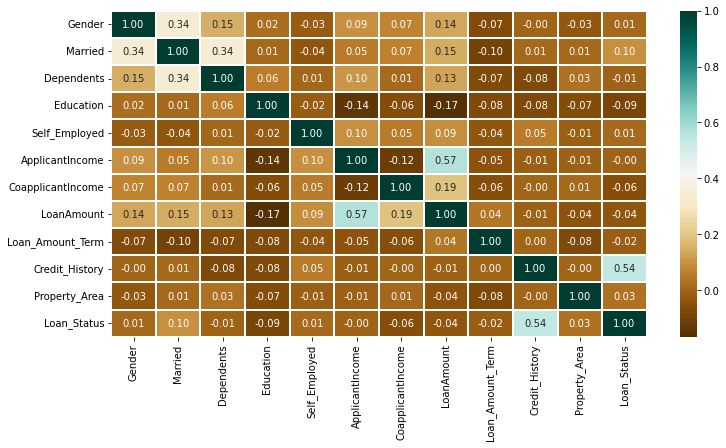

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

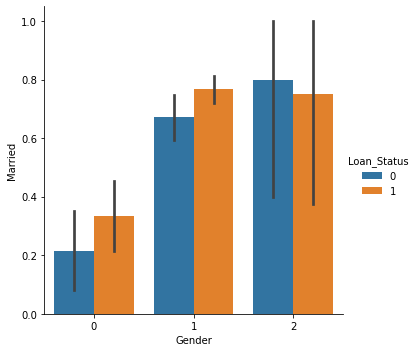

In [38]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=df)

In [39]:
for col in df.columns:
    df[col]=df[col].fillna(df[col].mean())
    
    

In [40]:
df.isna() .sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X=df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']
X.shape,Y.shape



((614, 11), (614,))

In [42]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.4, random_state=1)


In [43]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=3)
rfc=RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
svc=SVC()
lc=LogisticRegression()



In [45]:
for clf in(rfc,knn,svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred=clf.predict(X_train)
    print("Accuracy score of", clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_train,Y_pred))

Accuracy score of RandomForestClassifier = 97.01086956521739
Accuracy score of KNeighborsClassifier = 77.17391304347827
Accuracy score of SVC = 70.38043478260869
Accuracy score of LogisticRegression = 82.88043478260869


G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
for clf in(rfc,knn,svc,lc):
     clf.fit(X_train,Y_train)
     Y_pred=clf.predict(X_test)
     print("Accuracy score of", clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_test,Y_pred))

Accuracy score of RandomForestClassifier = 76.42276422764228
Accuracy score of KNeighborsClassifier = 62.19512195121951
Accuracy score of SVC = 67.07317073170732
Accuracy score of LogisticRegression = 78.86178861788618


G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['RFC.pkl']